In [1]:
import openeo
import rasterio
import matplotlib.pyplot as plt

In [2]:
#connect to the API
connection = openeo.connect("openeo.dataspace.copernicus.eu")

In [3]:
# Authenticate the connection
connection.authenticate_oidc()

Authenticated using refresh token.


<Connection to 'https://openeo.dataspace.copernicus.eu/openeo/1.2/' with OidcBearerAuth>

In [4]:
# List collections available on the openEO back-end
connection.list_collection_ids()

['SENTINEL3_OLCI_L1B',
 'SENTINEL3_SLSTR',
 'SENTINEL_5P_L2',
 'COPERNICUS_VEGETATION_PHENOLOGY_PRODUCTIVITY_10M_SEASON1',
 'COPERNICUS_VEGETATION_PHENOLOGY_PRODUCTIVITY_10M_SEASON2',
 'COPERNICUS_PLANT_PHENOLOGY_INDEX',
 'ESA_WORLDCOVER_10M_2020_V1',
 'ESA_WORLDCOVER_10M_2021_V2',
 'COPERNICUS_VEGETATION_INDICES',
 'SENTINEL2_L1C',
 'SENTINEL2_L2A',
 'SENTINEL1_GRD',
 'COPERNICUS_30',
 'LANDSAT8_L2',
 'SENTINEL3_SYN_L2_SYN',
 'SENTINEL3_SLSTR_L2_LST',
 'SENTINEL1_GLOBAL_MOSAICS']

In [5]:
# create a sentine-2 datacube
s2_cube = connection.load_collection(
    "SENTINEL2_L2A",
    spatial_extent={"west": -124.12, "south": 49.08, "east": -123.80, "north": 49.22},
    temporal_extent=["2023-07-01", "2024-09-30"],
    bands=["B02", "B04", "B08"],
    max_cloud_cover=40,
)

In [6]:
#compute NDVI
red = s2_cube.band("B04") * 0.0001
nir = s2_cube.band("B08") * 0.0001

ndvi_cube = (nir - red) / (nir +  red )

In [7]:
#execute the job
#use the max value of the time serie
ndvi = ndvi_cube.max_time()

In [8]:
#download the result in geotiff
outfile= r"Q:\dss_workarea\mlabiadh\learning\openeo\ndvi.tiff"
ndvi.download(outfile)

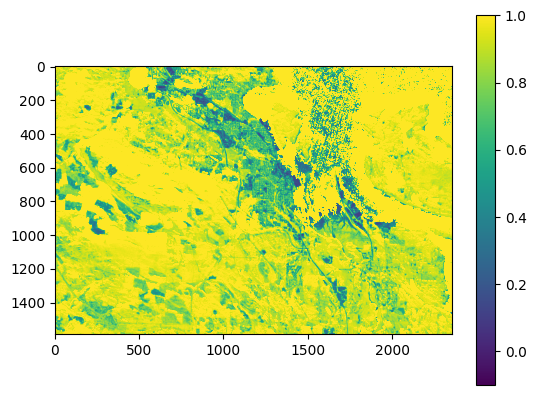

In [9]:

img2 = rasterio.open(outfile).read()
plt.imshow(img2[0], vmax=1, vmin=-0.1)
plt.colorbar()